<a href="https://colab.research.google.com/github/cyberdefender001/mohirdev.praktika/blob/main/Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='Reds')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
X = df.drop(['Outcome'], axis=1).values
y = df['Outcome']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X, y)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_predict = knn.predict(X_test)

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.38095238095238093

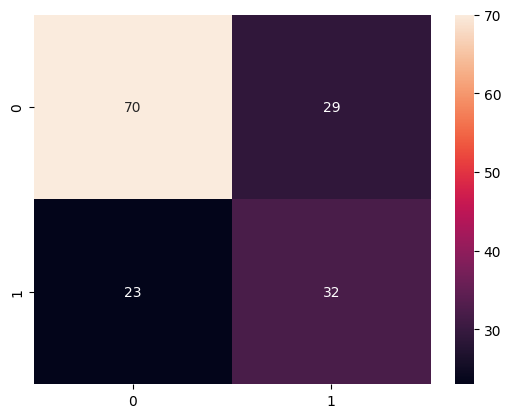

In [13]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.5245901639344263
recall=0.5818181818181818
f1=0.5517241379310346
accuracy=0.6623376623376623


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [17]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

In [18]:
from sklearn.metrics import classification_report
print('Classification report: \n', classification_report(y, predict))

Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       500
           1       0.62      0.53      0.57       268

    accuracy                           0.72       768
   macro avg       0.69      0.68      0.68       768
weighted avg       0.72      0.72      0.72       768



In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1,25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [20]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 22, 21, 20, 19, 18,  6, 16, 11,  9,  3,  2,  1, 17, 15,  4,
        8,  5,  7, 12, 10, 13, 13], dtype=int32)

In [21]:
knn_gscv.best_params_

{'n_neighbors': 14}

In [22]:
knn_gscv.best_score_

0.7578558696205755